In [23]:
import numpy as np
import pandas as pd

In [24]:
df=pd.read_csv('Advertising.csv')

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [27]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


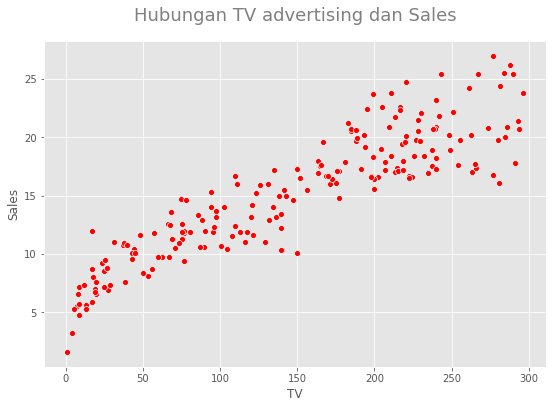

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='TV', y = 'Sales', data=df, ax=ax, color='red')

ax.set_title('Hubungan TV advertising dan Sales', pad=20, size=18, color='gray')

plt.savefig('manual_scaterplot.png')

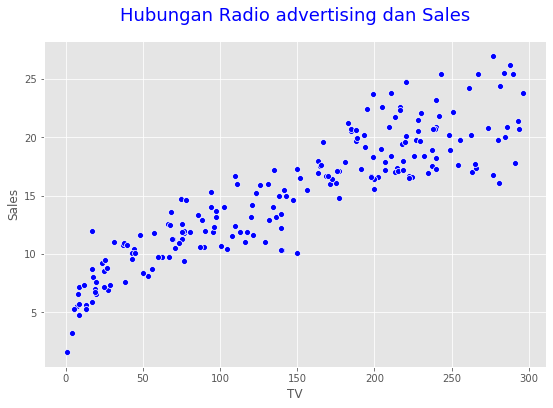

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Radio', y = 'Sales', data=df, ax=ax, color='blue')

ax.set_title('Hubungan Radio advertising dan Sales', pad=20, size=18, color='blue')

plt.savefig('manual_scaterplot_radio.png')

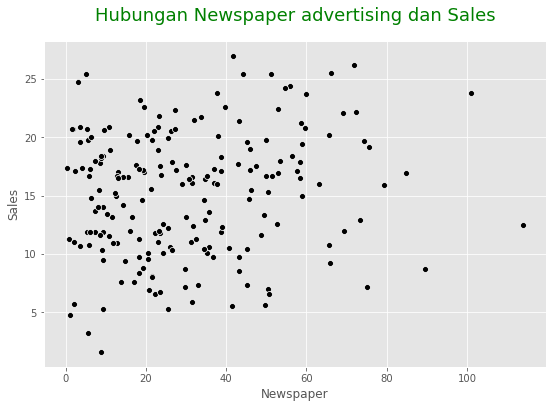

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Newspaper', y = 'Sales', data=df, ax=ax, color='black')

ax.set_title('Hubungan Newspaper advertising dan Sales', pad=20, size=18, color='green')

plt.savefig('manual_scaterplot_newspaper.png')

In [53]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [36]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,missing_value,%
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


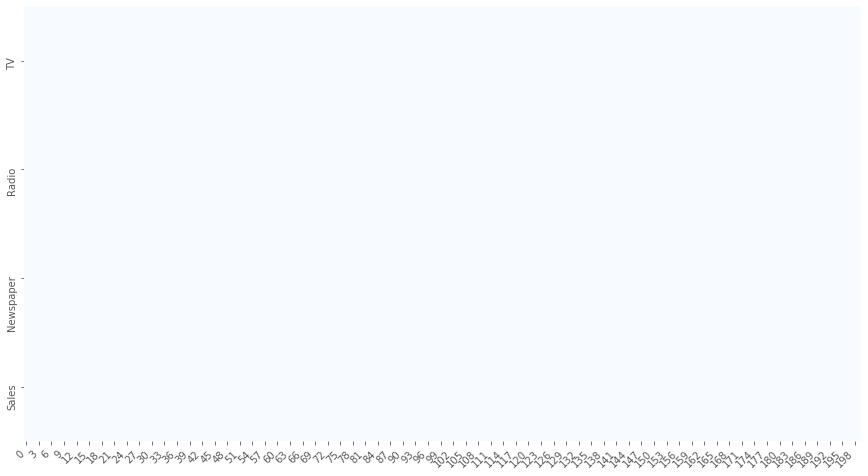

In [49]:
plot_missing_value(df,return_df=True)

,missing_value,%
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


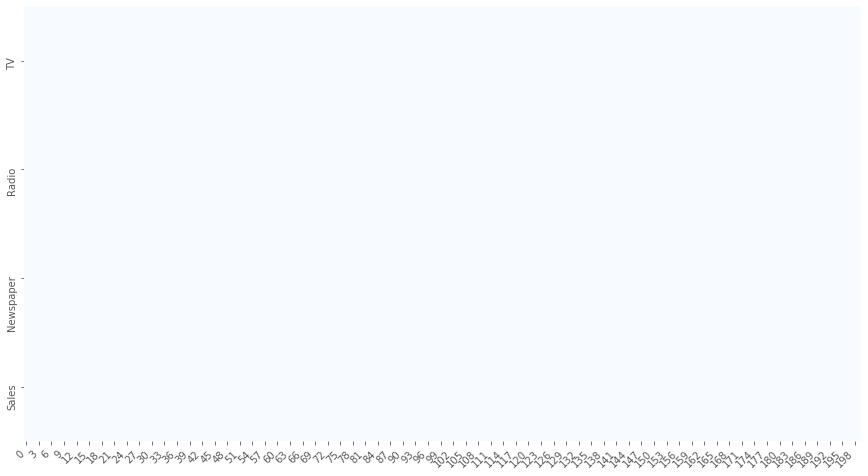

In [34]:
plot_missing_value(df,return_df=True)

In [37]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [38]:
x=df.drop(columns='Sales')
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
y=df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [39]:
X = df.drop(columns="Sales")
y = df.Sales #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [41]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['TV', 'Radio', 'Newspaper']),
    
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

C:\Users\Putra Ramanda\anaconda3\envs\jcopml\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': True}
0.9001416005862131 0.8952171256032321 0.9059011844150825


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.1s finished


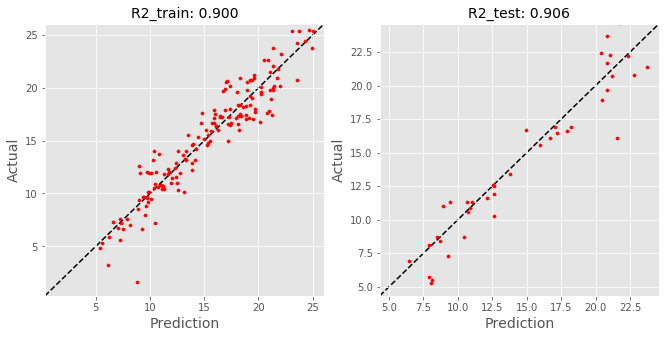

In [45]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [46]:
save_model(model, "modelf.pkl")

Model is pickled as model/modelf.pkl


In [47]:
save_model(model.best_estimator_, "modelestf.pkl")

Model is pickled as model/modelestf.pkl
